In [1]:
# Import csv about flight info to be dataset of Visualization 2

import pandas as pd
df = pd.read_csv('flights_sample_3m.csv', low_memory = False)
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [2]:
# Only keep the columns relevant for visualization

df = df[['FL_DATE', 'DEST', 'DEST_CITY']]
df.head()

,FL_DATE,DEST,DEST_CITY
0,2019-01-09,EWR,"Newark, NJ"
1,2022-11-19,SEA,"Seattle, WA"
2,2022-07-22,MSP,"Minneapolis, MN"
3,2023-03-06,SFO,"San Francisco, CA"
4,2020-02-23,DFW,"Dallas/Fort Worth, TX"


In [3]:
# Extract the year from flight date and create a new column YEAR

df['YEAR'] = pd.DatetimeIndex(df['FL_DATE']).year

# Rearrange the columns order
df = df.iloc[:, [3, 0, 1, 2]]
df.head()

,YEAR,FL_DATE,DEST,DEST_CITY
0,2019,2019-01-09,EWR,"Newark, NJ"
1,2022,2022-11-19,SEA,"Seattle, WA"
2,2022,2022-07-22,MSP,"Minneapolis, MN"
3,2023,2023-03-06,SFO,"San Francisco, CA"
4,2020,2020-02-23,DFW,"Dallas/Fort Worth, TX"


In [4]:
# Only keep rows which year is 2022

df = df[df['YEAR'] == 2022]
df.head()

,YEAR,FL_DATE,DEST,DEST_CITY
1,2022,2022-11-19,SEA,"Seattle, WA"
2,2022,2022-07-22,MSP,"Minneapolis, MN"
15,2022,2022-05-01,BDL,"Hartford, CT"
20,2022,2022-05-05,CHS,"Charleston, SC"
22,2022,2022-11-12,MSP,"Minneapolis, MN"


In [5]:
# Count the number of flights per destination and assign to a new dataframe
final_df = df.groupby(['DEST', 'DEST_CITY']).size().reset_index(name = 'Number of Flights')

# Rename the columns
final_df.rename(columns = {'DEST': 'Destination', 'DEST_CITY': 'City Name'}, inplace = True)

final_df.head()

,Destination,City Name,Number of Flights
0,ABE,"Allentown/Bethlehem/Easton, PA",400
1,ABI,"Abilene, TX",192
2,ABQ,"Albuquerque, NM",1955
3,ABR,"Aberdeen, SD",64
4,ABY,"Albany, GA",84


In [6]:
# Sort by number of flights and extract the top 10 records for further steps

final_df.sort_values(by = 'Number of Flights', ascending = False, inplace = True)
final_df = final_df.iloc[:10]
final_df

,Destination,City Name,Number of Flights
22,ATL,"Atlanta, GA",32605
96,DFW,"Dallas/Fort Worth, TX",28181
95,DEN,"Denver, CO",27608
253,ORD,"Chicago, IL",26685
194,LAX,"Los Angeles, CA",19658
73,CLT,"Charlotte, NC",19586
192,LAS,"Las Vegas, NV",17900
314,SEA,"Seattle, WA",17798
203,LGA,"New York, NY",17227
268,PHX,"Phoenix, AZ",16928


In [7]:
# Import the csv with latitude and longitude of destination
# Merge with my table

airports_df = pd.read_csv('airports.csv')
merge_df = pd.merge(final_df, airports_df[['IATA', 'Latitude', 'Longitude']], how = 'left', left_on = 'Destination', right_on = 'IATA')

# Drop IATA column as it is duplicated with destination
merge_df = merge_df.drop(columns = 'IATA')

merge_df

,Destination,City Name,Number of Flights,Latitude,Longitude
0,ATL,"Atlanta, GA",32605,33.636700,-84.428101
1,DFW,"Dallas/Fort Worth, TX",28181,32.896801,-97.038002
2,DEN,"Denver, CO",27608,39.861698,-104.672997
3,ORD,"Chicago, IL",26685,41.978600,-87.904800
4,LAX,"Los Angeles, CA",19658,33.942501,-118.407997
5,CLT,"Charlotte, NC",19586,35.214001,-80.943100
6,LAS,"Las Vegas, NV",17900,36.080101,-115.152000
7,SEA,"Seattle, WA",17798,47.449001,-122.308998
8,LGA,"New York, NY",17227,40.777199,-73.872597
9,PHX,"Phoenix, AZ",16928,33.434299,-112.012001


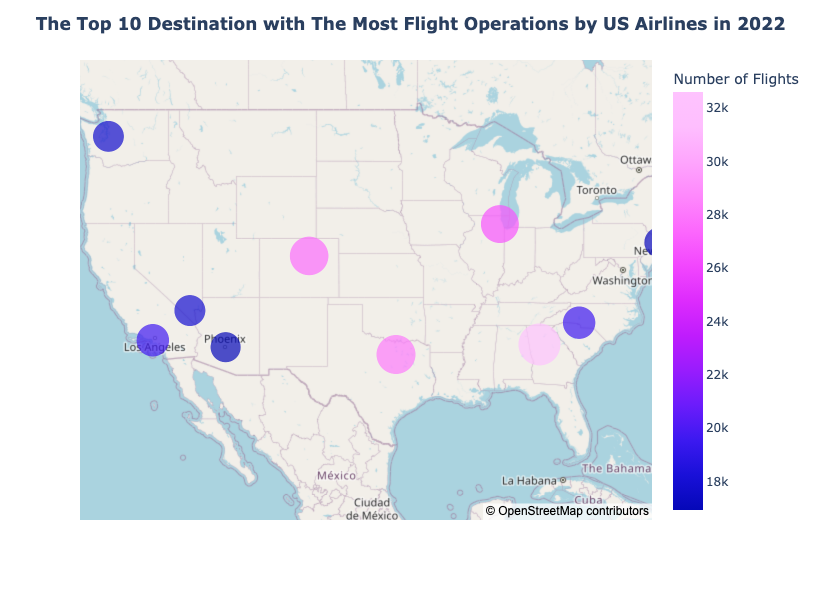

In [18]:
# Create bubble map

import plotly.express as px

fig = px.scatter_mapbox(merge_df, 
                        lat = 'Latitude',     # Mark points of positions according to latitude & longitude
                        lon = 'Longitude',
                        size = 'Number of Flights',   # Redundant encoding on bubble size and colour for number of flights
                        color = 'Number of Flights',
                        hover_name = 'City Name',
                        zoom = 3,
                        mapbox_style = 'open-street-map',
                        size_max = 30,
                        width = 1000,
                        height = 600,
                        color_continuous_scale = 'Plotly3'   # Sequential colour scale is chosen for higher discriminability
                       )

fig.update_layout(title = '<b>The Top 10 Destination with The Most Flight Operations by US Airlines in 2022</b>',
                  title_x = 0.5
                 )

fig.show()